In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

データファイルの準備

In [2]:
import requests
import zipfile
import io

# ZIPファイルのURL
url = "http://chasen.org/~daiti-m/gpbook/data/gpr-data.zip"

# ダウンロードしてメモリ上で解凍
response = requests.get(url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("./../data/chap1")

回帰の実装

In [3]:
def linear_regression(X, y):
    """
    線形回帰の実装
    X: 入力データ (n_samples, n_features)
    y: 出力データ (n_samples,)
    """
    y = y.reshape(-1, 1)  # yを列ベクトルに変形
    X = np.vstack([np.ones(X.shape[0]),X.T]).T # バイアス項を追加
    b = X.T @ y
    w = np.linalg.inv(X.T @ X) @ b  # 重みの計算
    return w

単回帰

In [4]:
def plot_simple(X, y, w):
    """
    単回帰の結果をプロット
    X: 入力データ (n_samples,)
    y: 出力データ (n_samples,)
    w: 重み (2,)
    """
    xmin,xmax = -5,5
    ymin,ymax = -5,5
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot([xmin,xmax],[0,0],'k',linewidth=1)
    ax.plot([0,0],[ymin,ymax],'k',linewidth=1)
    ax.scatter(X, y, label='Data')

    xx = np.linspace(xmin, xmax, 10)
    yy = w[0] + w[1] * xx
    ax.plot(xx, yy)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    plt.show()

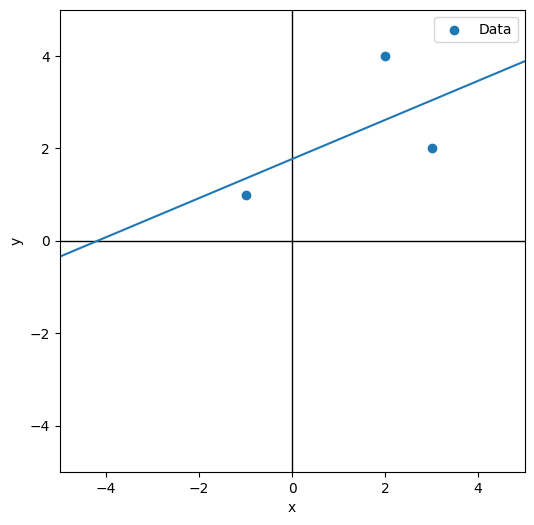

In [5]:
# データの読み込み
data = np.loadtxt("./../data/chap1/data/simple1.dat")
y1 = data[:, 0]
X1 = data[:, 1]

# 単回帰の実行
w1 = linear_regression(X1, y1)

# 結果のプロット
plot_simple(X1, y1, w1)

重回帰

In [17]:
def plot_multiple(X, y, w):
    """
    重回帰の結果をプロット
    X: 入力データ (n_samples, n_features)
    y: 出力データ (n_samples,)
    w: 重み (n_features + 1,)
    """
    scatter = go.Scatter3d(
        x=X[:, 0],
        y=X[:, 1],
        z=y,
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='Data'
    )
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 10))
    zz = w[0] + w[1] * xx + w[2] * yy
    surface = go.Surface(
        x=xx,
        y=yy,
        z=zz,
        opacity=0.5,
        colorscale=[[0, 'blue'], [1, 'blue']],
        name='Regression Plane',
        showscale=False
    )
    layout = go.Layout(
        scene=dict(
            xaxis_title='X1',
            yaxis_title='X2',
            zaxis_title='y'
        ),
    )
    fig = go.Figure(data=[scatter, surface], layout=layout)
    fig.show()

In [18]:
# データの読み込み
data = np.loadtxt("./../data/chap1/multiple.dat")
X2 = data[:, 0:2]
y2 = data[:, 2]

# 重回帰の実行
w2 = linear_regression(X2, y2)

# 結果のプロット
plot_multiple(X2, y2, w2)